# Práctica 2: Determinación de Tipos de Estrellas
Autores: Rodrigo Maroto Caño y Rodrigo Toldos Frutos  
Correos electrónicos: 100454455@alumnos.uc3m.es - 100454470@alumnos.uc3m.es   
Usuarios en GitHub: @RodrigoMaroto (owner) y @100454470   
Link del repositorio: https://github.com/RodrigoMaroto/Practica2-ML/

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder

np.random.seed(454455)

In [14]:
def kmeans(X, n_clusters=2, max_iters=100):
        centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
        for _ in range(max_iters):
            distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)

            new_centroids = np.empty_like(centroids)
            for i in range(n_clusters):
                new_centroids[i] = X[labels == i].mean(axis=0)
            
            if np.allclose(new_centroids, centroids):
                break
            centroids = new_centroids
        return labels

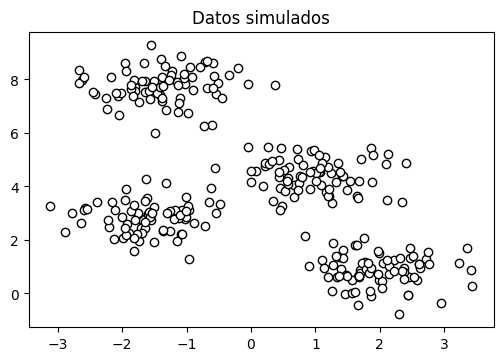

In [15]:
X, y = make_blobs(
    n_samples    = 300,
    n_features   = 2,
    centers      = 4,
    cluster_std  = 0.60,
    shuffle      = True,
    random_state = 0
)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos simulados');

In [16]:
X_scaled = scale(X)

In [17]:
%%timeit
y_predict = kmeans(X_scaled, 4)


1.28 ms ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=42)
modelo_kmeans.fit(X=X_scaled)

KMeans(n_clusters=4, n_init=25, random_state=42)

In [19]:
%%timeit
y_predict = modelo_kmeans.predict(X=X_scaled)

149 µs ± 3.75 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
y_predict = kmeans(X_scaled, 4)

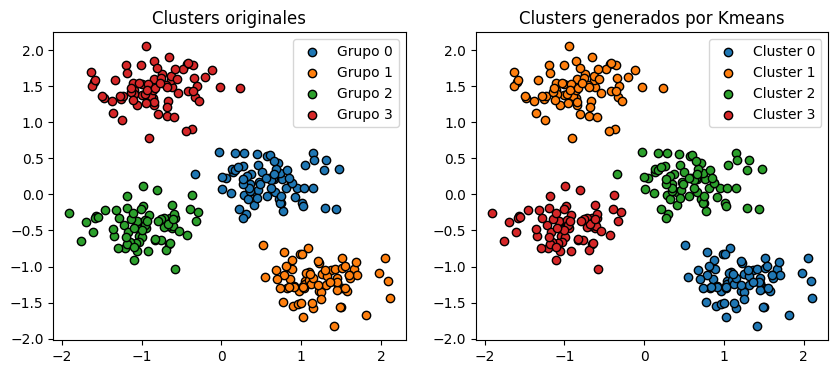

In [21]:
# Representación gráfica: grupos originales vs clusters creados
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax[0].set_title('Clusters originales')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

## Introducción de los Datos

### Primera Opción: OneHotEncoding

In [82]:
df = pd.read_csv("stars_data.csv")

# Vamos a utilizar el OneHotEncoder de scikit para las variables categóricas. Ponemos sparse_output = False para que se guarden los valores
# que son 0 también.

enc = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
new_col_color = enc.fit_transform(df[['Color']])
new_col_sc = enc.fit_transform(df[['Spectral_Class']])

df = pd.concat([df, new_col_color, new_col_sc], axis = 1)
df.drop(columns = ['Color', 'Spectral_Class'], inplace = True)

data = df.values
scaled_data = scale(data)
y_predict = kmeans(scaled_data, 6)

print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 5 5 5 2 4 4 4 4 4 1 3 3 4 4 4 4
 4 4 4 0 0 0 0 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 5 4 2 2 2 2 2 4 2 4 4 4 4 4 4 4 4 4 1 2 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 4 4 4 4
 5 2 3 4 4 3 3 3 3 3 4 1 1 1 1 1 1 1 1 1 1 1 0 0 3 2 0 0 1 3 3 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 3 4 4 3 1 1 4 3 3 4 1 1
 1 1 1 1 1 1 1 1 3 1 1 3 3 1 1 5 5 1]


In [81]:
'''plt.scatter(scaled_data[:, 6], scaled_data[:, 7], c=y_predict, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()'''

"plt.scatter(scaled_data[:, 6], scaled_data[:, 7], c=y_predict, cmap='viridis', alpha=0.5)\nplt.xlabel('Feature 1')\nplt.ylabel('Feature 2')\nplt.title('K-Means Clustering Results')\nplt.colorbar(label='Cluster')\nplt.show()"

### Segunda Opción: Variable Ordinal

Como se indica en el enunciado, el color está asociado a la cantidad de energía, y algo parecido sucede con la clase espectral. Por tanto, puede tener sentido utilizar estas variables como ordinales, con el fin de representar una cercanía mayor entre dos cantidades de energía parecidas. Con OneHotEncoding no conservamos estas relaciones, ya que se utilizan como columnas independientes. Como se puede ver en la imagen, podemos establecer un orden atendiendo a la temperatura.


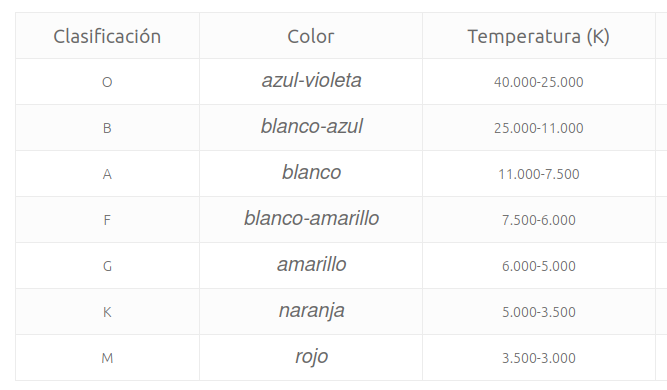

In [94]:
df = pd.read_csv("stars_data.csv")

# Primero vamos a ver qué colores hay 
#print(df['Color'].unique())

#['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
#'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
#'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
#'Blue-White']

# Creamos un diccionario para sustituir esos nombres por valores que representen el orden

color_values = {"Red": 1, "Orange-Red": 2, "Orange": 3, "Pale yellow orange": 4, "yellowish": 5, "Yellowish": 5, "White-Yellow": 6,
                "yellow-white": 6,"Yellowish White": 7,"White": 8, "white": 8, "Whitish": 8, "Blue white": 9,"Blue White": 9,  
                "Blue-white": 9, "Blue-White": 9, "Blue": 10,
                }

df['Color'] = df['Color'].map(color_values)

# Hacemos lo mismo con la clase espectral

#print(df['Spectral_Class'].unique())
# ['M' 'B' 'A' 'F' 'O' 'K' 'G']

sc_values = {"M": 1, "K": 2, "G":3, "F":4, "A":5, "B":6, "O":7}
df['Spectral_Class'] = df['Spectral_Class'].map(sc_values)


In [97]:
data = df.values
scaled_data = scale(data)
y_predict = kmeans(scaled_data, 6)

print(y_predict)

[4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 4 3 3 3 2 2 2 2 2 2 2 2 2 3 1 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 1 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 3 2 2 1 1 1 1 1 2 1 1 1 1 1 5
 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 4 3 3 3 3 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 5 5 5 1 5 5 1 5 1 1 4 4 4 4 4
 4 4 4 4 4 3 3 3 3 3 3 3 4 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1]
